Word2Vec
===================

## Using Pretrained Word2Vec Vectors

Gensim has functions to support the downloading of pretrained Word2Vec vectors. Let's use another visualisation tool ([`sklearn.manifold.TSNE`](https://scikit-learn.org/stable/modules/generated/sklearn.manifold.TSNE.html)) to see how the word embeddings can help us identify clusters of words with similar meaning. 

In [2]:
from sklearn.manifold import TSNE
import numpy as np
import matplotlib.pyplot as plt

In [4]:

import gensim.downloader as api
wv = api.load('word2vec-google-news-300')

### Analogy Test: A is to B as C is to D

```
king - man + woman = ?
```

Google has released a analogy test set, you can use it to evaluate the performance of word embeddings. 

:::{admonition} Your Turn
Try some other set of words and see how well the pretrained embeddings perform. Consider writing an evaluation function using the analogy test set. If the first word returned by the analogy test matches what's in the test set, it's a HIT. As we only consider the most similar for comparison, this evaluation is called HIT@1. 
:::

In [41]:
wv.most_similar(positive=["king", "woman"], negative=["man"])

[('queen', 0.7118193507194519),
 ('monarch', 0.6189674735069275),
 ('princess', 0.5902431011199951),
 ('crown_prince', 0.5499460697174072),
 ('prince', 0.5377322435379028),
 ('kings', 0.5236844420433044),
 ('Queen_Consort', 0.5235945582389832),
 ('queens', 0.5181134939193726),
 ('sultan', 0.5098593235015869),
 ('monarchy', 0.5087411403656006)]

### Plot using TSNE

In [7]:
def display_closestwords_tsnescatterplot(model, word):
    
    arr = np.empty((0,300), dtype='f')
    word_labels = [word]

    # get close words
    close_words = model.similar_by_word(word)
    
    # add the vector for each of the closest words to the array
    arr = np.append(arr, np.array([model[word]]), axis=0)
    for wrd_score in close_words:
        wrd_vector = model[wrd_score[0]]
        word_labels.append(wrd_score[0])
        arr = np.append(arr, np.array([wrd_vector]), axis=0)
        
    # find tsne coords for 2 dimensions
    tsne = TSNE(n_components=2, random_state=0)
    np.set_printoptions(suppress=True)
    Y = tsne.fit_transform(arr)

    x_coords = Y[:, 0]
    y_coords = Y[:, 1]
    # display scatter plot
    plt.scatter(x_coords, y_coords)

    for label, x, y in zip(word_labels, x_coords, y_coords):
        plt.annotate(label, xy=(x, y), xytext=(0, 0), textcoords='offset points')
    plt.xlim(x_coords.min()+0.00005, x_coords.max()+0.00005)
    plt.ylim(y_coords.min()+0.00005, y_coords.max()+0.00005)
    plt.title(f'Words closest to: {word}')
    plt.show()

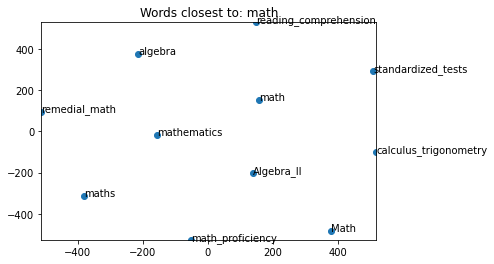

In [8]:
display_closestwords_tsnescatterplot(wv, "math")

### Interactive Visualisation using bokeh

In [11]:
from bokeh.plotting import figure, show
from bokeh.io import push_notebook, output_notebook
from bokeh.models import ColumnDataSource, LabelSet
from bokeh.plotting import figure, show
from bokeh.io import push_notebook, output_notebook
from bokeh.models import ColumnDataSource, LabelSet
import pandas as pd

In [12]:
def interactive_tsne(text_labels, tsne_array):
    '''makes an interactive scatter plot with text labels for each point'''

    # Define a dataframe to be used by bokeh context
    bokeh_df = pd.DataFrame(tsne_array, text_labels, columns=['x','y'])
    bokeh_df['text_labels'] = bokeh_df.index

    # interactive controls to include to the plot
    TOOLS="hover, zoom_in, zoom_out, box_zoom, undo, redo, reset, box_select"

    p = figure(tools=TOOLS, plot_width=700, plot_height=700)

    # define data source for the plot
    source = ColumnDataSource(bokeh_df)

    # scatter plot
    p.scatter('x', 'y', source=source, fill_alpha=0.6,
              fill_color="#8724B5",
              line_color=None)

    # text labels
    labels = LabelSet(x='x', y='y', text='text_labels', y_offset=8,
                      text_font_size="8pt", text_color="#555555",
                      source=source, text_align='center')

    p.add_layout(labels)

    # show plot inline
    output_notebook()
    show(p)

In [14]:
vocab = ['math', 'computing', 'physics']
input_vocab =  [word for word in vocab if word in wv.key_to_index.keys()]
X = wv[input_vocab]
# find tsne coords for 2 dimensions
tsne = TSNE(n_components=2, random_state=0)
X_tsne = tsne.fit_transform(X)

print(input_vocab)

points = len(input_vocab)
interactive_tsne(list(input_vocab)[:points], X_tsne)

['math', 'computing', 'physics']


Loading BokehJS ...

## Training your own Word2Vec Embeddings

### Data Crawling from the Web

In [17]:
from __future__ import division, unicode_literals 
import codecs
from bs4 import BeautifulSoup
import urllib

f = urllib.request.urlopen("https://en.wikipedia.org/wiki/Natural_language_processing")

document= BeautifulSoup(f.read()).get_text()
print(document)





Natural language processing - Wikipedia


































Natural language processing

From Wikipedia, the free encyclopedia



Jump to navigation
Jump to search
This article is about natural language processing done by computers. For the natural language processing done by the human brain, see Language processing in the brain.
Field of computer science and linguistics
 An automated online assistant providing customer service on a web page, an example of an application where natural language processing is a major component.[1]
Natural language processing (NLP) is a subfield of linguistics, computer science, and artificial intelligence concerned with the interactions between computers and human language, in particular how to program computers to process and analyze large amounts of natural language data.  The goal is a computer capable of "understanding" the contents of documents, including the contextual nuances of the language within them. The technology can then a

### Pre-processing

In [18]:
import gensim
import re
from gensim.corpora import Dictionary

In [20]:
doc_tokenized = gensim.utils.simple_preprocess(str(document), deacc=True)
doc_tokenized[:10]

['natural',
 'language',
 'processing',
 'wikipedia',
 'natural',
 'language',
 'processing',
 'from',
 'wikipedia',
 'the']

In [22]:
dictionary = Dictionary()
BoW_corpus = dictionary.doc2bow(doc_tokenized, allow_update=True)
BoW_corpus = [(dictionary[id], freq) for id, freq in BoW_corpus]
BoW_corpus[:10]

[('aaron', 1),
 ('abandoned', 1),
 ('abbreviations', 1),
 ('abelson', 1),
 ('able', 2),
 ('about', 5),
 ('above', 3),
 ('abstract', 1),
 ('academy', 1),
 ('accents', 1)]

In [23]:
def convert(tup, dict):
    for a, b in tup:
        dict[a] = b
    return dict
BoW_corpus_dict = dict()
convert(BoW_corpus, BoW_corpus_dict)      

{'aaron': 1,
 'abandoned': 1,
 'abbreviations': 1,
 'abelson': 1,
 'able': 2,
 'about': 5,
 'above': 3,
 'abstract': 1,
 'academy': 1,
 'accents': 1,
 'access': 1,
 'accidentally': 1,
 'accordance': 1,
 'accountants': 1,
 'accountlog': 1,
 'accurate': 3,
 'accurately': 1,
 'achieve': 2,
 'acl': 5,
 'aclweb': 1,
 'acm': 2,
 'acquire': 1,
 'acquiring': 1,
 'acquisition': 1,
 'act': 1,
 'action': 1,
 'acts': 1,
 'actual': 1,
 'actually': 1,
 'addition': 1,
 'additional': 2,
 'addressed': 1,
 'adjective': 1,
 'adjectives': 1,
 'administration': 1,
 'advanced': 1,
 'advances': 1,
 'advantage': 2,
 'advantages': 1,
 'affects': 1,
 'after': 2,
 'against': 1,
 'age': 1,
 'agent': 1,
 'agglutinated': 1,
 'agree': 1,
 'ai': 8,
 'aid': 7,
 'al': 1,
 'alan': 1,
 'alexander': 1,
 'algorithm': 3,
 'algorithms': 12,
 'alignment': 1,
 'alike': 1,
 'alisa': 1,
 'all': 8,
 'allocation': 2,
 'allows': 1,
 'almost': 1,
 'along': 2,
 'alpac': 1,
 'already': 1,
 'also': 14,
 'although': 2,
 'ambiguous': 2,


### Visualisation of Pre-trained Embeddings

We only look at the non-stopwords that are in the Word2Vec vocabulary. 

In [25]:
import nltk
from nltk.corpus import stopwords

vocab_sorted = dict(sorted(BoW_corpus_dict.items(), key=lambda item: item[1], reverse=True))
#print(vocab_sorted)

stopwords = stopwords.words('english')
input_vocab =  [word for word in vocab_sorted if word in wv.key_to_index.keys() and word not in stopwords]
points = len(input_vocab)
X = wv[input_vocab]
X_tsne = tsne.fit_transform(X[:points])

#print(input_vocab)

#points = len(input_vocab)

interactive_tsne(list(input_vocab)[:points], X_tsne)

Loading BokehJS ...

### Training your own Word2Vec

In [27]:
from gensim.models import Word2Vec

cores = 16
model = Word2Vec(min_count=1,
                     window=2,
                     vector_size=100,
                     sample=6e-5, 
                     alpha=0.03, 
                     min_alpha=0.0007, 
                     negative=20,
                     workers=cores-1)

In [28]:
from time import time

t = time()

model.build_vocab([doc_tokenized], progress_per=10)

print('Time to build vocab: {} mins'.format(round((time() - t) / 60, 2)))

Time to build vocab: 0.0 mins


In [29]:
t = time()

model.train(doc_tokenized, total_examples=model.corpus_count, epochs=1000, report_delay=1)

print('Time to train the model: {} mins'.format(round((time() - t) / 60, 2)))

Time to train the model: 0.16 mins


In [32]:
model.wv.key_to_index.keys()

dict_keys(['the', 'of', 'and', 'to', 'language', 'in', 'is', 'natural', 'for', 'as', 'processing', 'text', 'nlp', 'on', 'that', 'learning', 'or', 'machine', 'with', 'such', 'speech', 'words', 'are', 'linguistics', 'be', 'this', 'systems', 'from', 'statistical', 'semantic', 'semantics', 'data', 'given', 'by', 'neural', 'more', 'an', 'can', 'which', 'word', 'based', 'edit', 'sentence', 'cognitive', 'rules', 'other', 'analysis', 'tasks', 'parsing', 'models', 'information', 'task', 'grammar', 'retrieved', 'computer', 'into', 'computational', 'methods', 'have', 'research', 'recognition', 'understanding', 'has', 'since', 'not', 'languages', 'also', 'was', 'translation', 'isbn', 'used', 'input', 'however', 'many', 'see', 'algorithms', 'discourse', 'example', 'it', 'human', 'deep', 'possible', 'been', 'using', 'segmentation', 'world', 'when', 'morphology', 'extraction', 'most', 'real', 'doi', 'one', 'often', 'determine', 'document', 'knowledge', 'www', 'some', 'role', 'part', 'but', 'at', 'use

### Comparing the purposely trained and the pre-trained vectors

We can see that due to the lack of data in training our own embeddings, the semantic information captured by the embeddings are not as meaningful as the the pre-trained ones. 

In [36]:
# Our trained domain specific embeddings
model.wv.most_similar(positive=["language"])

[('generated', 0.3286932706832886),
 ('cache', 0.29854971170425415),
 ('charge', 0.27286359667778015),
 ('segmentation', 0.26987093687057495),
 ('assisted', 0.26623496413230896),
 ('drop', 0.2609272599220276),
 ('on', 0.25290459394454956),
 ('successfully', 0.2467595636844635),
 ('any', 0.24194024503231049),
 ('easier', 0.2374984174966812)]

In [37]:
# Pretrained embeddings
wv.most_similar(positive=["language"])

[('langauge', 0.747669517993927),
 ('Language', 0.6695358157157898),
 ('languages', 0.6341331601142883),
 ('English', 0.6120712757110596),
 ('CMPB_Spanish', 0.6083105802536011),
 ('nonnative_speakers', 0.6063110828399658),
 ('idiomatic_expressions', 0.5889802575111389),
 ('verb_tenses', 0.5841568112373352),
 ('Kumeyaay_Diegueno', 0.5798824429512024),
 ('dialect', 0.5724599957466125)]